<a href="https://colab.research.google.com/github/nmontero86/TFI/blob/gh-pages/TFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Final Integrador - Marketing**


# Introducción

El siguiente trabajo de investigación se aplica sobre el área de Marketing de una empresa que se dedica a la venta de servicios y productos informáticos. 
Esta área se encarga de generar campañas de Marketing, utilizando diferentes canales, para poder captar la mayor cantidad de clientes que se interesen en adquirir los productos o servicios promocionados. 
Los directivos de la empresa analizaron la performance de las diferentes campañas en los diferentes canales y detectaron que ciertas campañas no tenían el resultado esperado, con porcentajes muy bajos o nulos referentes al engagement de los clientes (midiéndose a través de dos métricas específicas: “Responses Creating Leads” y “Converted Leads From Lead Creating Responses”). 
Se busca analizar la performance actual de las campañas de marketing, entender las variables que entran en juego a la hora de obtener los resultados de engagement y abordando el problema a través del desarrollo de algoritmos de Machine Learning poder predecir si un cliente va a interesarse por los productos y servicios de la empresa. De esa manera se podrán obtener mejores resultados para las dos variables de engagement y por consecuencia generar más ganancias en la aplicación de cada campaña de Marketing.  Esos algoritmos se van a validar y probar, verificando su nivel de efectividad para finalmente escoger aquel que sea el más certero.

# Objetivos

Desarrollar un modelo predictivo que contenga un algoritmo de Machine Learning que permita mejorar la performance de las métricas Responses Creating Leads y Converted Leads From Lead Creating Responses.


# Objetivos específicos

*   Desarrollar diferentes algoritmos de predicción.
*   Validar y probar los diferentes algoritmos.
*   Verificar el nivel de efectividad de los diferentes algoritmos.
*   Determinar el algoritmo más efectivo y diseñar la interfaz del modelo.




# Metodología

In [ ]:
##Se instalan las librerias necesarias
!pip install xlrd
!pip install psycopg2
!pip install psycopg2-binary
##!pip install pycaret

     |████████████████████████████████| 3.0MB 7.9MB/s 


In [ ]:
##Imports
##import pandas as pd
##import numpy  as np
##import matplotlib.pyplot as plt
##import psycopg2 as ps
##import io
##from statistics import mean 
##import seaborn as sns
##import matplotlib.pyplot as plt
##%matplotlib inline
##from sklearn.compose import ColumnTransformer
##from sklearn.preprocessing import OneHotEncoder
##from sklearn.model_selection import train_test_split
##from sklearn.model_selection import GridSearchCV
##from sklearn.ensemble import RandomForestClassifier
##from sklearn.ensemble import RandomForestRegressor
##from sklearn.metrics import mean_squared_error
##from sklearn import metrics
##from pycaret.classification import *
##from pandas_profiling import ProfileReport 
##import plotly.express as px
##import plotly.graph_objects as go
##from plotly.subplots import make_subplots
##import "psycopg2-binary" as psb

In [ ]:
#Se carga el CSV que contiene los datos a utilizar para el trabajo final integrador
from google.colab import files
data_to_load = files.upload()

Saving Tabla_17Nov.csv to Tabla_17Nov (4).csv


In [ ]:
#Se asigna el CSV cargado y se imprime el dataset para mostrar un set de datos. 
import pandas as pd
import io
dataset = pd.read_csv(io.StringIO(data_to_load['Tabla_17Nov.csv'].decode('utf-8')))
dataset

,COMPANY_KEY,COUNTRY,REGION,ANNUAL_SALES_USD,MARKET_SEGMENT,ONE_VOICE_INDUSTRY,ONE_VOICE_SEGMENT,COMPANY_REVENUE_BAND,MARKET_SEGMENT_BAND,NUMBER_OF_EMPLOYEES,KEY_ACCOUNT_FLAG,EMAILABLE_FLAG,PHONABLE_FLAG,CONTACTABLE_FLAG,VANITY_DEPARTMENT,VANITY_LEVEL,VANITY_SPECIALITY,CHANNEL_NAME,LEAD_NUMBER,RESPONSE_ID,RESPONSE_TYPE_ROLLUP_LEVEL_2,RESPONSE_TYPE_ROLLUP,RESPONSE_TYPE,Market_Segment_Band,Responses_Creating_Leads,Converted_Leads_From_Lead_Creating_Responses
0,58620980099,UNITED STATES,NaN,7.062920e+08,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,500-1B,500-1B,1900.0,NaN,Y,Y,Y,Technology,Professional,Architecture,Others,AJN8B5,48520885.0,Event,Online Events,iSeminar Webshow Attended,500,0,0
1,91994225099,UNITED STATES,NaN,9.415000e+09,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2B+,2B+,3177.0,N,Y,Y,Y,Technology,Professional,General Technology,Others,AKWQJT,46379362.0,Form Submit,Oracle Promotions,Oracle Promotions,2000,0,0
2,45783157499,UNITED STATES,NaN,1.444477e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2B+,2B+,2800.0,N,Y,Y,Y,Technology,Manager,Database Administration,Others,AFQ4F8,35138029.0,Event,Session,Session Attended,2000,0,0
3,45783157499,UNITED STATES,NaN,1.444477e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2B+,2B+,2800.0,N,Y,Y,Y,Technology,Manager,Database Administration,Others,AJZYDC,35138029.0,Event,Session,Session Attended,2000,0,0
4,45783157499,UNITED STATES,NaN,1.444477e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2B+,2B+,2800.0,N,Y,Y,Y,Technology,Manager,Database Administration,Others,AKXXWG,35138029.0,Event,Session,Session Attended,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,80544238499,UNITED STATES,NaN,1.024100e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2B+,2B+,26662.0,N,Y,Y,Y,Technology,Senior Professional,Systems,NaN,NaN,29785341.0,Form Submit,Whitepaper Downloaded,Whitepaper Downloaded,2000,0,0
21485,33200299699,NIGERIA,EMEA,2.000000e+07,Lower Midsize,"Mining, Oil and Gas",Support Activities for Mining,10-50M,10-50M,31.0,NaN,Y,Y,Y,NaN,Blank Title,NaN,NaN,NaN,30246191.0,Event,Attendees,Event Attended,10,0,0
21486,80544238499,UNITED STATES,NaN,1.024100e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2B+,2B+,26662.0,N,Y,Y,Y,NaN,Blank Title,NaN,NaN,NaN,29769354.0,Form Submit,Whitepaper Downloaded,Whitepaper Downloaded,2000,0,0
21487,50944087399,EGYPT,EMEA,2.300000e+10,Above Midsize,"Mining, Oil and Gas",Oil and Gas Extraction,2B+,2B+,35000.0,NaN,Y,Y,Y,Technology,Senior Professional,General Technology,NaN,NaN,35072004.0,Event,Registered,Event Registered,2000,0,0


In [ ]:
#Se hace un describe del dataset de las variables númericas
dataset.describe()

,COMPANY_KEY,ANNUAL_SALES_USD,NUMBER_OF_EMPLOYEES,RESPONSE_ID,Market_Segment_Band,Responses_Creating_Leads,Converted_Leads_From_Lead_Creating_Responses
count,2.148900e+04,2.134600e+04,21477.000000,2.148600e+04,2.148900e+04,21489.000000,21489.000000
mean,5.270362e+10,1.379344e+10,12644.788285,5.952331e+08,5.723412e+04,0.288147,0.006422
std,2.559657e+10,4.911925e+10,28465.527613,2.363623e+10,2.362465e+06,0.452911,0.079881
min,2.265814e+08,1.300000e+06,2.000000,-1.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.393799e+10,7.062920e+08,1000.000000,2.693394e+07,5.000000e+02,0.000000,0.000000
50%,5.497148e+10,3.362000e+09,2964.000000,3.373934e+07,2.000000e+03,0.000000,0.000000
75%,6.997337e+10,7.948800e+09,8714.000000,4.695552e+07,2.000000e+03,1.000000,0.000000
max,9.985532e+10,3.884000e+11,302100.000000,1.000445e+12,1.000000e+08,1.000000,1.000000


In [ ]:
#Se reemplaza uno de los canales de comunicación de las campañas. 
dataset['CHANNEL_NAME'] = dataset['CHANNEL_NAME'].replace(['Oracle websites - Tracked'],['Company websites - Tracked'])

In [ ]:
#Se muestran los distintos valores que contiene la variable "CHANNEL_NAME"
dataset.CHANNEL_NAME.unique()

array(['Others', 'Company websites - Tracked', 'Email Tracked',
       'External websites - Tracked', 'Social Natural', 'Sales eVite',
       nan], dtype=object)

In [ ]:
#Se eliminan aquellas variables que se creen no servir para el modelo predictivo
del dataset['LEAD_NUMBER']
del dataset['RESPONSE_TYPE_ROLLUP_LEVEL_2']
del dataset['RESPONSE_TYPE_ROLLUP']
del dataset['MARKET_SEGMENT_BAND']
del dataset['COMPANY_REVENUE_BAND']
del dataset['RESPONSE_ID']
del dataset['VANITY_SPECIALITY']

In [ ]:
#Se chequea la cantidad de valores NULL en cada una de las variables
dataset.isnull().sum()

COMPANY_KEY                                         0
COUNTRY                                             0
REGION                                          14171
ANNUAL_SALES_USD                                  143
MARKET_SEGMENT                                      0
ONE_VOICE_INDUSTRY                                  0
ONE_VOICE_SEGMENT                                   0
NUMBER_OF_EMPLOYEES                                12
KEY_ACCOUNT_FLAG                                13567
EMAILABLE_FLAG                                      0
PHONABLE_FLAG                                       0
CONTACTABLE_FLAG                                    0
VANITY_DEPARTMENT                                2474
VANITY_LEVEL                                        0
CHANNEL_NAME                                     5633
RESPONSE_TYPE                                       0
Market_Segment_Band                                 0
Responses_Creating_Leads                            0
Converted_Leads_From_Lead_Cr

In [ ]:
#Reemplazo de valores NULL a "Unspecified"
dataset["VANITY_DEPARTMENT"].fillna("Unspecified", inplace = True)
dataset["CHANNEL_NAME"].fillna("Unspecified", inplace = True)
#Para la variables "ANNUAL_SALES_USD" se calcula la media y se asigna ese valor para aquellos registros que tienen valores NULL
dataset["ANNUAL_SALES_USD"] = dataset["ANNUAL_SALES_USD"].fillna(dataset["ANNUAL_SALES_USD"].mean())
#En el caso del campo KEY_ACCOUNT_FLAG, para aquellos registros en que el valor es NULL se determina que se reemplaza con el flag 'N' 
#ya que siempre que es un KEY ACCOUNT el valor se completa como Y
dataset["KEY_ACCOUNT_FLAG"].fillna('N', inplace = True)
#Se calcula para la variable "NUMBER_OF_EMPLOYEES" cual es el valor mínimo de los valores que contiene para poder reemplazar
#aquellos valores NULL por este valor minimo. 
dataset["NUMBER_OF_EMPLOYEES"].fillna(dataset["NUMBER_OF_EMPLOYEES"].min(), inplace = True)
#Para la variable "REGION" donde los paises son UNITED STATES o CANADA se asigna como región NA
dataset.loc[dataset['COUNTRY'] == 'UNITED STATES', 'REGION'] = 'NA'
dataset.loc[dataset['COUNTRY'] == 'CANADA', 'REGION'] = 'NA'
#Elimino el campo COUNTRY
del dataset['COUNTRY']

In [ ]:
#Se rechequea la cantidad de valores NULL en cada una de las variables
dataset.isnull().sum()

COMPANY_KEY                                     0
REGION                                          0
ANNUAL_SALES_USD                                0
MARKET_SEGMENT                                  0
ONE_VOICE_INDUSTRY                              0
ONE_VOICE_SEGMENT                               0
NUMBER_OF_EMPLOYEES                             0
KEY_ACCOUNT_FLAG                                0
EMAILABLE_FLAG                                  0
PHONABLE_FLAG                                   0
CONTACTABLE_FLAG                                0
VANITY_DEPARTMENT                               0
VANITY_LEVEL                                    0
CHANNEL_NAME                                    0
RESPONSE_TYPE                                   0
Market_Segment_Band                             0
Responses_Creating_Leads                        0
Converted_Leads_From_Lead_Creating_Responses    0
dtype: int64

In [ ]:
#Se genera el encoding de aquellas variables que son flags cambiando los valores Y por 1 y los N por 0
dataset['KEY_ACCOUNT_FLAG'] = dataset['KEY_ACCOUNT_FLAG'].replace(['Y','N'],[1,0])
dataset['EMAILABLE_FLAG'] = dataset['EMAILABLE_FLAG'].replace(['Y','N'],[1,0])
dataset['PHONABLE_FLAG'] = dataset['PHONABLE_FLAG'].replace(['Y','N'],[1,0])
dataset['CONTACTABLE_FLAG'] = dataset['CONTACTABLE_FLAG'].replace(['Y','N'],[1,0])
#Se modifica el valor de las variables "VANITY_DEPARTMENT" y "MARKET_SEGMENT" donde es "Unknown" a "Unspecified"
dataset['VANITY_DEPARTMENT'] = dataset['VANITY_DEPARTMENT'].replace(['Unknown'],['Unspecified'])
dataset['MARKET_SEGMENT'] = dataset['MARKET_SEGMENT'].replace(['Unknown'],['Unspecified'])

dataset

,COMPANY_KEY,REGION,ANNUAL_SALES_USD,MARKET_SEGMENT,ONE_VOICE_INDUSTRY,ONE_VOICE_SEGMENT,NUMBER_OF_EMPLOYEES,KEY_ACCOUNT_FLAG,EMAILABLE_FLAG,PHONABLE_FLAG,CONTACTABLE_FLAG,VANITY_DEPARTMENT,VANITY_LEVEL,CHANNEL_NAME,RESPONSE_TYPE,Market_Segment_Band,Responses_Creating_Leads,Converted_Leads_From_Lead_Creating_Responses
0,58620980099,NA,7.062920e+08,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,1900.0,0,1,1,1,Technology,Professional,Others,iSeminar Webshow Attended,500,0,0
1,91994225099,NA,9.415000e+09,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,3177.0,0,1,1,1,Technology,Professional,Others,Oracle Promotions,2000,0,0
2,45783157499,NA,1.444477e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2800.0,0,1,1,1,Technology,Manager,Others,Session Attended,2000,0,0
3,45783157499,NA,1.444477e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2800.0,0,1,1,1,Technology,Manager,Others,Session Attended,2000,0,0
4,45783157499,NA,1.444477e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,2800.0,0,1,1,1,Technology,Manager,Others,Session Attended,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,80544238499,NA,1.024100e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,26662.0,0,1,1,1,Technology,Senior Professional,Unspecified,Whitepaper Downloaded,2000,0,0
21485,33200299699,EMEA,2.000000e+07,Lower Midsize,"Mining, Oil and Gas",Support Activities for Mining,31.0,0,1,1,1,Unspecified,Blank Title,Unspecified,Event Attended,10,0,0
21486,80544238499,NA,1.024100e+10,Above Midsize,"Mining, Oil and Gas",Support Activities for Mining,26662.0,0,1,1,1,Unspecified,Blank Title,Unspecified,Whitepaper Downloaded,2000,0,0
21487,50944087399,EMEA,2.300000e+10,Above Midsize,"Mining, Oil and Gas",Oil and Gas Extraction,35000.0,0,1,1,1,Technology,Senior Professional,Unspecified,Event Registered,2000,0,0


In [ ]:
#Se chequea la métrica "RESPONSES CREATING LEADS". 
#cuantas ocurrencias de cada valor tiene el dataset para "RESPONSES CREATING LEADS":
dataset['Responses_Creating_Leads'].value_counts()

0    15297
1     6192
Name: Responses_Creating_Leads, dtype: int64

In [ ]:
#En % cuantas ocurrencias de cada valor:
dataset['Responses_Creating_Leads'].value_counts(normalize=True)

0    0.711853
1    0.288147
Name: Responses_Creating_Leads, dtype: float64

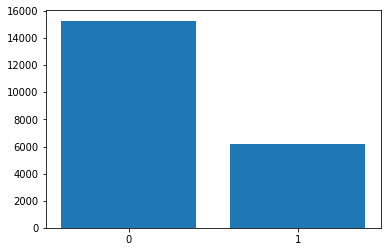

In [ ]:
#Gráfico que muestra la cantidad de valores para la métrica "Responses Creating Leads"
import matplotlib.pyplot as plt
x = ['0', '1']
y = dataset['Responses_Creating_Leads'].value_counts()
plt.bar(x, y)
plt.show()

In [ ]:
#Se agrupa por la variable "CHANNEL_NAME", mostrando en % la métrica "Responses_Creating_Leads" 
channels_grouped = dataset.groupby(["CHANNEL_NAME"])
channels_grouped = channels_grouped[["Responses_Creating_Leads"]].count().add_prefix("Avg_of_")
channels_grouped.apply(lambda x: x/x.sum()).reset_index()

,CHANNEL_NAME,Avg_of_Responses_Creating_Leads
0,Company websites - Tracked,0.052539
1,Email Tracked,0.157848
2,External websites - Tracked,0.006003
3,Others,0.484806
4,Sales eVite,0.029690
5,Social Natural,0.006980
6,Unspecified,0.262134


In [ ]:
#Se agrupa por la variable "CHANNEL_NAME", mostrando la métrica "Responses_Creating_Leads" para saber que cantidad de registros hay por cada canal
channels_grouped = dataset.groupby(["CHANNEL_NAME"])["Responses_Creating_Leads"].count()
channels_grouped

CHANNEL_NAME
Company websites - Tracked      1129
Email Tracked                   3392
External websites - Tracked      129
Others                         10418
Sales eVite                      638
Social Natural                   150
Unspecified                     5633
Name: Responses_Creating_Leads, dtype: int64

In [ ]:
#Se agrupa por la variable "CHANNEL_NAME" y "Responses_Creating_Leads", para saber cuantos registros por cada canal y por cada valor de la métrica hay
channels_grouped = dataset.groupby(["CHANNEL_NAME", "Responses_Creating_Leads"])["Responses_Creating_Leads"].count()
channels_grouped

CHANNEL_NAME                 Responses_Creating_Leads
Company websites - Tracked   0                            611
                             1                            518
Email Tracked                0                           2503
                             1                            889
External websites - Tracked  0                             97
                             1                             32
Others                       0                           5865
                             1                           4553
Sales eVite                  0                            484
                             1                            154
Social Natural               0                            104
                             1                             46
Unspecified                  0                           5633
Name: Responses_Creating_Leads, dtype: int64

In [ ]:
#Se chequea la métrica "CONVERTED LEADS FROM LEAD CREATING RESPONSES". 
#cuantas ocurrencias de cada valor tiene el dataset para "CONVERTED LEADS FROM LEAD CREATING RESPONSES":
dataset['Converted_Leads_From_Lead_Creating_Responses'].value_counts()

0    21351
1      138
Name: Converted_Leads_From_Lead_Creating_Responses, dtype: int64

In [ ]:
#En % cuantas ocurrencias de cada valor:
dataset['Converted_Leads_From_Lead_Creating_Responses'].value_counts(normalize=True)

0    0.993578
1    0.006422
Name: Converted_Leads_From_Lead_Creating_Responses, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


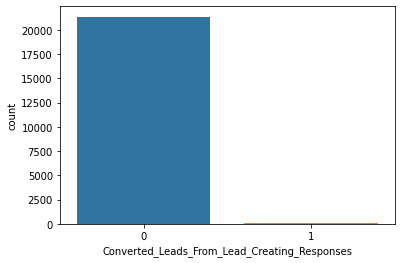

In [ ]:
#Gráfico que muestra la cantidad de valores para la métrica "CONVERTED LEADS FROM LEAD CREATING RESPONSES"
import seaborn as sns
sns.countplot(dataset['Converted_Leads_From_Lead_Creating_Responses'])

In [ ]:
#Se genera un nuevo dataset que contiene sólo aquellos casos que contienen la métrica "Responses_Creating_Leads" en 1(uno) que va a utilizarse para la predicción 
#de la metrica Converted
dataset_converted = dataset[(dataset['Responses_Creating_Leads']==1)]
print(dataset_converted.shape)

(6192, 18)


In [ ]:
#Se agrupa por la variable "CHANNEL_NAME", mostrando en % la métrica "Converted_Leads_From_Lead_Creating_Responses" 
channels_grouped_converted = dataset_converted.groupby(["CHANNEL_NAME"])
channels_grouped_converted = channels_grouped_converted[["Converted_Leads_From_Lead_Creating_Responses"]].count().add_prefix("Avg_of_")
channels_grouped_converted.apply(lambda x: x/x.sum()).reset_index()

,CHANNEL_NAME,Avg_of_Converted_Leads_From_Lead_Creating_Responses
0,Company websites - Tracked,0.083656
1,Email Tracked,0.143572
2,External websites - Tracked,0.005168
3,Others,0.735304
4,Sales eVite,0.024871
5,Social Natural,0.007429


In [ ]:
#Se agrupa por la variable "CHANNEL_NAME", mostrando la métrica "Converted_Leads_From_Lead_Creating_Responses" para saber que cantidad de registros hay por cada canal
channels_grouped_converted = dataset_converted.groupby(["CHANNEL_NAME"])["Converted_Leads_From_Lead_Creating_Responses"].count()
channels_grouped_converted

CHANNEL_NAME
Company websites - Tracked      518
Email Tracked                   889
External websites - Tracked      32
Others                         4553
Sales eVite                     154
Social Natural                   46
Name: Converted_Leads_From_Lead_Creating_Responses, dtype: int64

In [ ]:
#Se agrupa por la variable "CHANNEL_NAME" y "Converted_Leads_From_Lead_Creating_Responses", para saber cuantos registros por cada canal y por cada valor de la métrica hay
channels_grouped_converted = dataset_converted.groupby(["CHANNEL_NAME","Converted_Leads_From_Lead_Creating_Responses"])["Converted_Leads_From_Lead_Creating_Responses"].count()
channels_grouped_converted

CHANNEL_NAME                 Converted_Leads_From_Lead_Creating_Responses
Company websites - Tracked   0                                                511
                             1                                                  7
Email Tracked                0                                                847
                             1                                                 42
External websites - Tracked  0                                                 32
Others                       0                                               4469
                             1                                                 84
Sales eVite                  0                                                153
                             1                                                  1
Social Natural               0                                                 42
                             1                                                  4
Name: Converted_Leads_Fr

In [ ]:
#Realizo One Hot Encoding para las columnas categóricas
from sklearn.preprocessing import OneHotEncoder
# Se crea una instancia de one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
##1
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['REGION']]).toarray())
#Se hace un merge del dataset original con las nuevas columnas
X_df = dataset.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"REGION_EMEA", 1:"REGION_LAD" , 2:"REGION_NA"}, inplace = True)
##2
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['MARKET_SEGMENT']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"MARKETSEG_ABOVE_MIDSIZE", 1:"MARKETSEG_LOWER_MIDSIZE" , 2:"MARKETSEG_MIDSIZE", 3:"MARKETSEG_UNSPECIFIED"}, inplace = True)
##3
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['ONE_VOICE_INDUSTRY']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
del X_df['ONE_VOICE_INDUSTRY']
X_df.rename(columns={0:"ONE_VOICE_INDUSTRY"}, inplace = True)
##4
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['ONE_VOICE_SEGMENT']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"VOICE_SEGMENT_MINING", 1:"VOICE_SEGMENT_OIL_GAS_X" , 2:"VOICE_SEGMENT_SUPPORT_ACT"}, inplace = True)
##5
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['VANITY_DEPARTMENT']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"VANITYDEP_ADMINISTRATION", 1:"VANITYDEP_COMMUNICATIONS" , 2:"VANITYDEP_CORP_PLANN", 3:"VANITYDEP_CUSTOMER_SERV", 4:"VANITYDEP_EDUCATION", 5:"VANITYDEP_ENGINEERING", 6:"VANITYDEP_FACILITIES", 7:"VANITYDEP_FINANCE", 8:"VANITYDEP_GOVERNMENT", 9:"VANITYDEP_HR", 10:"VANITYDEP_LEGAL", 11:"VANITYDEP_MNGMNT", 12:"VANITYDEP_MKTG", 13:"VANITYDEP_MEDICAL", 14:"VANITYDEP_NEWS", 15:"VANITYDEP_OPS", 16:"VANITYDEP_QA", 17:"VANITYDEP_RESEARCH_DEV", 18:"VANITYDEP_SALES", 19:"VANITYDEP_TECHNOLOGY", 20:"VANITYDEP_TRANSPORTATION", 21:"VANITYDEP_UNSPECIFIED"}, inplace = True)
##6
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['VANITY_LEVEL']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"VANITYLEVEL_ASSISTANT", 1:"VANITYLEVEL_BLANKTITLE" , 2:"VANITYLEVEL_CEO", 3:"VANITYLEVEL_CADMINOFF", 4:"VANITYLEVEL_CCOMMOFF", 5:"VANITYLEVEL_CDATAOFF", 6:"VANITYLEVEL_CFINANCEOFF", 7:"VANITYLEVEL_CHROFF", 8:"VANITYLEVEL_CINFOOFFER", 9:"VANITYLEVEL_CLEGALOFF", 10:"VANITYLEVEL_CMRKTNGOFF", 11:"VANITYLEVEL_COPSOFF", 12:"VANITYLEVEL_CPLANNOFF", 13:"VANITYLEVEL_CPURCHASINGOFF", 14:"VANITYLEVEL_CRISKOFF", 15:"VANITYLEVEL_CSALESOFF", 16:"VANITYLEVEL_CSECURITYOFF", 17:"VANITYLEVEL_CTECHOFF", 18:"VANITYLEVEL_CONSULTANT", 19:"VANITYLEVEL_DIRECTOR", 20:"VANITYLEVEL_EXECUTIVE", 21:"VANITYLEVEL_MANAGER", 22:"VANITYLEVEL_OTHER", 23:"VANITYLEVEL_PROFESSIONAL", 24:"VANITYLEVEL_SRMANAGER", 25:"VANITYLEVEL_SRPROFESSIONAL", 26:"VANITYLEVEL_STUDENT"}, inplace = True)
##7
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['CHANNEL_NAME']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"CHANNEL_EMAIL", 1:"CHANNEL_EXTERNALWEB" , 2:"CHANNEL_ORACLEWEB", 3:"CHANNEL_OTHERS", 4:"CHANNEL_SALES", 5:"CHANNEL_SOCIAL", 6:"CHANNEL_UNSPECIFIED"}, inplace = True)
##8
#Encoding para la columna
enc_df = pd.DataFrame(enc.fit_transform(dataset[['RESPONSE_TYPE']]).toarray())
#Se hace merge con las nueva columna
X_df = X_df.join(enc_df)
#Se renombra la columna
X_df.rename(columns={0:"RESPONSE_AGENCY", 1:"RESPONSE_CHAT_AFTER_HS" , 2:"RESPONSE_CHAT_HANDLED", 3:"RESPONSE_COMPLETED_EXT_WEB_SURVEY", 4:"RESPONSE_COMPLETED_WEB_SURVEY", 5:"RESPONSE_CONTACT_US_SUBMITTED", 6:"RESPONSE_DEMO", 7:"RESPONSE_EVENT_ATTENDED", 8:"RESPONSE_EVENT_REGISTERED", 9:"RESPONSE_EVENT_REGISTRATION_APPROVED", 10:"RESPONSE_EVENT_TRADESHOW_BOOTH_VISIT", 11:"RESPONSE_EVENT_TRADESHOW_ENGAGED", 12:"RESPONSE_EVENT_WALK_IN", 13:"RESPONSE_FACEBOOK_AD", 14:"RESPONSE_LANDING_PAD_SUBMISSION", 15:"RESPONSE_LINKEDIN_AD", 16:"RESPONSE_LINKEDIN_AD", 17:"RESPONSE_OU_HIGH_PRIORITY", 18:"RESPONSE_OU_LOW_PRIORITY", 19:"RESPONSE_OU_MID_PRIORITY", 20:"RESPONSE_ORACLE_PROMOTIONS", 21:"RESPONSE_PATHFACTORY_VISITOR_ACT", 22:"RESPONSE_PATHFACTORY_VISITOR_SESS", 23:"RESPONSE_PAY_PREQUAL_COOL", 24:"RESPONSE_PAY_PREQUAL_HOT", 25:"RESPONSE_PAY_PREQUAL_WARM", 26:"RESPONSE_PRODUCT_ENQUIRY", 27:"RESPONSE_QUALI_HIGH_VALUE_CONTENT", 28:"RESPONSE_QUICK_TOUR", 29:"RESPONSE_RECORDED_ASSET_REGISTERED", 30:"RESPONSE_SESSION_ATTENDED", 31:"RESPONSE_TCO_CALCULATOR_USED", 32:"RESPONSE_TM_PREQUAL_COOL", 33:"RESPONSE_TM_PREQUAL_HOT", 34:"RESPONSE_TM_PREQUAL_MRKTNG", 35:"RESPONSE_TM_PREQUAL_WARM", 36:"RESPONSE_TRIAL", 37:"RESPONSE_VA_CONFIRMED", 38:"RESPONSE_WHITEPAPER_DOWNLOADED", 39:"RESPONSE_ISEMINAR_ATTENDED", 40:"RESPONSE_ISEMINAR_DOWNLOADED", 41:"RESPONSE_ISEMINAR_REGISTERED"}, inplace = True)


In [ ]:
#Se eliminas las columnas categóricas
del X_df['REGION']
del X_df['MARKET_SEGMENT']
del X_df['ONE_VOICE_SEGMENT']
del X_df['VANITY_DEPARTMENT']
del X_df['VANITY_LEVEL']
del X_df['CHANNEL_NAME']
del X_df['RESPONSE_TYPE']
#Se muestra el nuevo dataset con las nuevas columnas
X_df

,COMPANY_KEY,ANNUAL_SALES_USD,NUMBER_OF_EMPLOYEES,KEY_ACCOUNT_FLAG,EMAILABLE_FLAG,PHONABLE_FLAG,CONTACTABLE_FLAG,Market_Segment_Band,Responses_Creating_Leads,Converted_Leads_From_Lead_Creating_Responses,REGION_EMEA,REGION_LAD,REGION_NA,MARKETSEG_ABOVE_MIDSIZE,MARKETSEG_LOWER_MIDSIZE,MARKETSEG_MIDSIZE,MARKETSEG_UNSPECIFIED,ONE_VOICE_INDUSTRY,VOICE_SEGMENT_MINING,VOICE_SEGMENT_OIL_GAS_X,VOICE_SEGMENT_SUPPORT_ACT,VANITYDEP_ADMINISTRATION,VANITYDEP_COMMUNICATIONS,VANITYDEP_CORP_PLANN,VANITYDEP_CUSTOMER_SERV,VANITYDEP_EDUCATION,VANITYDEP_ENGINEERING,VANITYDEP_FACILITIES,VANITYDEP_FINANCE,VANITYDEP_GOVERNMENT,VANITYDEP_HR,VANITYDEP_LEGAL,VANITYDEP_MNGMNT,VANITYDEP_MKTG,VANITYDEP_MEDICAL,VANITYDEP_NEWS,VANITYDEP_OPS,VANITYDEP_QA,VANITYDEP_RESEARCH_DEV,VANITYDEP_SALES,...,RESPONSE_CHAT_HANDLED,RESPONSE_COMPLETED_EXT_WEB_SURVEY,RESPONSE_COMPLETED_WEB_SURVEY,RESPONSE_CONTACT_US_SUBMITTED,RESPONSE_DEMO,RESPONSE_EVENT_ATTENDED,RESPONSE_EVENT_REGISTERED,RESPONSE_EVENT_REGISTRATION_APPROVED,RESPONSE_EVENT_TRADESHOW_BOOTH_VISIT,RESPONSE_EVENT_TRADESHOW_ENGAGED,RESPONSE_EVENT_WALK_IN,RESPONSE_FACEBOOK_AD,RESPONSE_LANDING_PAD_SUBMISSION,RESPONSE_LINKEDIN_AD,RESPONSE_LINKEDIN_AD,RESPONSE_OU_HIGH_PRIORITY,RESPONSE_OU_LOW_PRIORITY,RESPONSE_OU_MID_PRIORITY,RESPONSE_ORACLE_PROMOTIONS,RESPONSE_PATHFACTORY_VISITOR_ACT,RESPONSE_PATHFACTORY_VISITOR_SESS,RESPONSE_PAY_PREQUAL_COOL,RESPONSE_PAY_PREQUAL_HOT,RESPONSE_PAY_PREQUAL_WARM,RESPONSE_PRODUCT_ENQUIRY,RESPONSE_QUALI_HIGH_VALUE_CONTENT,RESPONSE_QUICK_TOUR,RESPONSE_RECORDED_ASSET_REGISTERED,RESPONSE_SESSION_ATTENDED,RESPONSE_TCO_CALCULATOR_USED,RESPONSE_TM_PREQUAL_COOL,RESPONSE_TM_PREQUAL_HOT,RESPONSE_TM_PREQUAL_MRKTNG,RESPONSE_TM_PREQUAL_WARM,RESPONSE_TRIAL,RESPONSE_VA_CONFIRMED,RESPONSE_WHITEPAPER_DOWNLOADED,RESPONSE_ISEMINAR_ATTENDED,RESPONSE_ISEMINAR_DOWNLOADED,RESPONSE_ISEMINAR_REGISTERED
0,58620980099,7.062920e+08,1900.0,0,1,1,1,500,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,91994225099,9.415000e+09,3177.0,0,1,1,1,2000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45783157499,1.444477e+10,2800.0,0,1,1,1,2000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45783157499,1.444477e+10,2800.0,0,1,1,1,2000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45783157499,1.444477e+10,2800.0,0,1,1,1,2000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,80544238499,1.024100e+10,26662.0,0,1,1,1,2000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#Se genera un nuevo dataset que contiene sólo aquellos casos que contienen la métrica "Responses_Creating_Leads" en 1(uno) que va a utilizarse para la predicción 
#de la metrica Converted
X_df_Converted = X_df[(X_df['Responses_Creating_Leads']==1)]
print(X_df_Converted.shape)

(6192, 119)


In [ ]:
#Teniendo el dataset que se va a utilizar para predecir la métrica "Responses_Creating_Leads", elimino la métrica Converted Leads
del X_df['Converted_Leads_From_Lead_Creating_Responses']

In [ ]:
#Divido ambos datasets en features y target
y_Leads = X_df['Responses_Creating_Leads']
X_Leads = X_df.drop('Responses_Creating_Leads', axis=1)

y_Converted = X_df_Converted['Converted_Leads_From_Lead_Creating_Responses']
X_Converted = X_df_Converted.drop('Converted_Leads_From_Lead_Creating_Responses', axis=1)

In [ ]:
#Se realiza el split into train test sets del dataset que va a predecir la métrica "Responses_Creating_Leads"
from sklearn.model_selection import train_test_split
X_train_Leads, X_test_Leads, y_train_Leads, y_test_Leads = train_test_split(X_Leads, y_Leads, test_size=0.30, random_state=1)
print(X_train_Leads.shape, X_test_Leads.shape, y_train_Leads.shape, y_test_Leads.shape)

(15042, 117) (6447, 117) (15042,) (6447,)


In [ ]:
#Se realiza el split into train test sets del dataset que va a predecir la métrica "Converted_Leads_From_Lead_Creating_Responses"
X_train_Converted, X_test_Converted, y_train_Converted, y_test_Converted = train_test_split(X_Converted, y_Converted, test_size=0.30, random_state=1)
print(X_train_Converted.shape, X_test_Converted.shape, y_train_Converted.shape, y_test_Converted.shape)

(4334, 118) (1858, 118) (4334,) (1858,)


# **Random Search Hyperparameter**

In [ ]:
import numpy  as np
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
#Número de árboles para random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
#Número de features para considerar en cada split
max_features = ['auto', 'sqrt']
#Máximo número de levels en el árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Mínimo numero de muestras requeridas para dividir un nodo
min_samples_split = [2, 5, 10]
#Mínimo numero de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]
#Método para seleccionar muestras para entrenar cada árbol
bootstrap = [True, False]
#Se crea el random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
#Se usa el random grid para buscar los mejores hiperparametros
#Primero se crea el modelo base a mejorar
rf = RandomForestClassifier()
#Random search de parametros, usando 3 fold cross validation, 
#Se busca a través de 100 combinaciones diferentes, y se usan todos los nucleos disponibles
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Fit el modelo random search
rf_random.fit(X_train_Leads, y_train_Leads)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.5min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 54.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#Se imprimen cuales son los mejores parámetros
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1577}

# **Grid Search with Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
#Se crea el grid de parametros basado en los resultados de Random Search
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [1000, 1500, 1800, 2100]
}
#Se crea el modelo base
rf = RandomForestClassifier()
#Se instancia el modelo grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
#Se hace el fit grid search en los datos
grid_search.fit(X_train_Leads, y_train_Leads)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 81.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 139.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 187.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#Se imprimen cuales son los mejores parámetros
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2100}

# **Predicción Para la métrica "Responses_Creating_Leads"**

In [ ]:
#Se crean arrays para las variables a predecir
import numpy  as np
y_train_Leads = np.asarray(y_train_Leads, dtype="|S6")
y_test_Leads = np.asarray(y_test_Leads, dtype="|S6")

Random Forest Classifier - N = 10



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Se instancia y se hace el fit de RandomForestClassifier
forest2 = RandomForestClassifier(n_estimators = 10, random_state=25)
forest2.fit(X_train_Leads, y_train_Leads)
#Se hace la prediccion para el test set
y_pred_Leads_test2 = forest2.predict(X_test_Leads)
#Se imprime el score de accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test_Leads, y_pred_Leads_test2)*100))

Accuracy = 89.65%.


In [ ]:
#Se crea una nueva variable Base Accuracy
Base_Accuracy = accuracy_score(y_test_Leads, y_pred_Leads_test2)

In [ ]:
#Matriz de confusion
confusion_matrix(y_test_Leads, y_pred_Leads_test2)

array([[4256,  338],
       [ 329, 1524]])

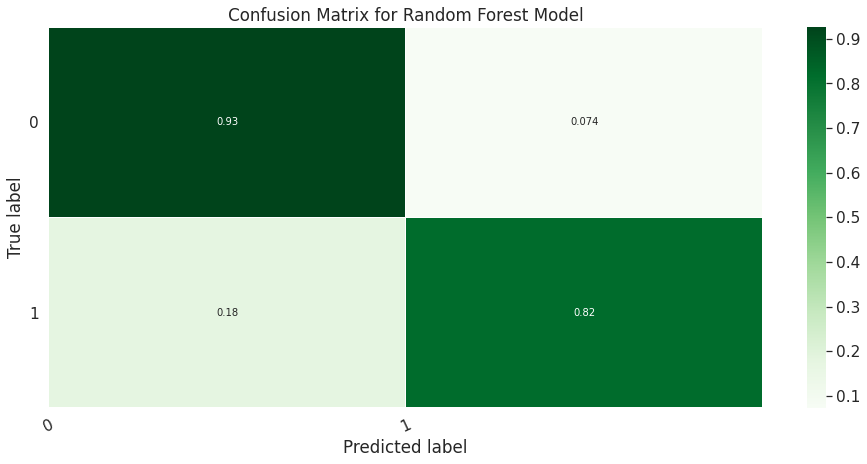

In [ ]:
#Se crea variable con la Matriz de Confusion
matrix = confusion_matrix(y_test_Leads, y_pred_Leads_test2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Se crea el plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Se agregan labels al plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#Se ve el reporte de clasificacion para test data y predicciones
print(classification_report(y_test_Leads, y_pred_Leads_test2))

              precision    recall  f1-score   support

        b'0'       0.93      0.93      0.93      4594
        b'1'       0.82      0.82      0.82      1853

    accuracy                           0.90      6447
   macro avg       0.87      0.87      0.87      6447
weighted avg       0.90      0.90      0.90      6447



Random Forest Classifier - N = 1577

In [ ]:
#Se instancia y se hace el fit de RandomForestClassifier con el valor en N obtenido en Random Search
forest3 = RandomForestClassifier(n_estimators = 1577, bootstrap = False,max_depth = 70, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state=25 )
forest3.fit(X_train_Leads, y_train_Leads)
#Se hace la prediccion para el test set
y_pred_Leads_test3 = forest3.predict(X_test_Leads)
#Se imprime el score de accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test_Leads, y_pred_Leads_test3)*100))

Accuracy = 90.45%.


In [ ]:
#Se crea una nueva variable Best Random Accuracy
Best_Random_Accuracy = accuracy_score(y_test_Leads, y_pred_Leads_test3)

In [ ]:
#Matriz de confusion
confusion_matrix(y_test_Leads, y_pred_Leads_test3)

array([[4271,  323],
       [ 293, 1560]])

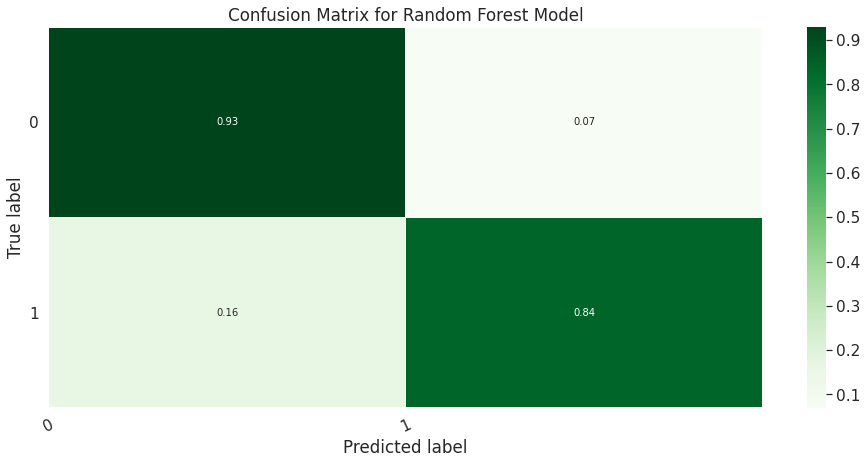

In [ ]:
#Se crea variable con la Matriz de Confusion
matrix = confusion_matrix(y_test_Leads, y_pred_Leads_test3)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Se crea el plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Se agregan labels al plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#Se ve el reporte de clasificacion para test data y predicciones
print(classification_report(y_test_Leads, y_pred_Leads_test3))

              precision    recall  f1-score   support

        b'0'       0.94      0.93      0.93      4594
        b'1'       0.83      0.84      0.84      1853

    accuracy                           0.90      6447
   macro avg       0.88      0.89      0.88      6447
weighted avg       0.90      0.90      0.90      6447



Random Forest Classifier - N = 2100

In [ ]:
#Se instancia y se hace el fit de RandomForestClassifier con el valor en N obtenido en Grid Search
forest4 = RandomForestClassifier(n_estimators = 2100, bootstrap = False,max_depth = 80, max_features = 3, min_samples_leaf = 1, min_samples_split = 5, random_state=25 )
forest4.fit(X_train_Leads, y_train_Leads)
#Se hace la prediccion para el test set
y_pred_Leads_test4 = forest4.predict(X_test_Leads)
#Se imprime el score de accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test_Leads, y_pred_Leads_test4)*100))

Accuracy = 90.20%.


In [ ]:
#Se crea una nueva variable Best Grid Search
Grid_Accuracy = accuracy_score(y_test_Leads, y_pred_Leads_test4)

In [ ]:
#Matriz de confusion
confusion_matrix(y_test_Leads, y_pred_Leads_test4)

array([[4286,  308],
       [ 324, 1529]])

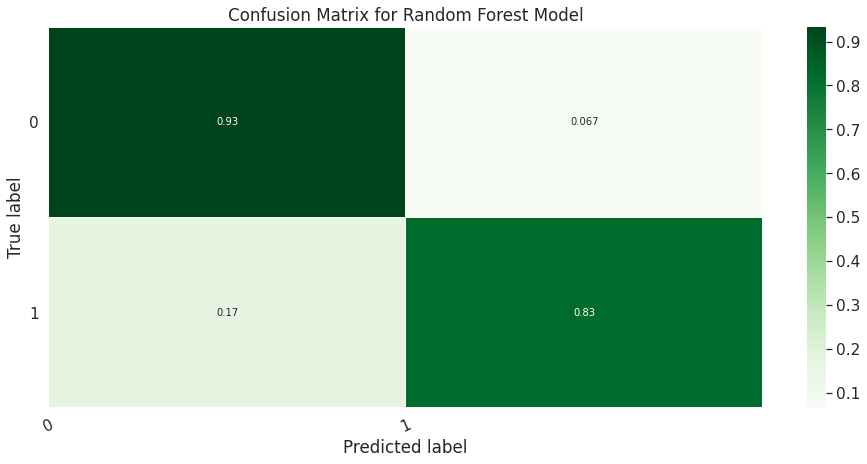

In [ ]:
#Se crea variable con la Matriz de Confusion
matrix = confusion_matrix(y_test_Leads, y_pred_Leads_test4)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Se crea el plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Se agregan labels al plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#Se ve el reporte de clasificacion para test data y predicciones
print(classification_report(y_test_Leads, y_pred_Leads_test4))

              precision    recall  f1-score   support

        b'0'       0.93      0.93      0.93      4594
        b'1'       0.83      0.83      0.83      1853

    accuracy                           0.90      6447
   macro avg       0.88      0.88      0.88      6447
weighted avg       0.90      0.90      0.90      6447



**Comparación de Modelos**

Modelo Base contra Modelo Best Random Search 

In [ ]:
print('Mejora: {:0.2f}%.'.format( 100 * (Best_Random_Accuracy - Base_Accuracy) / Base_Accuracy))

Mejora: 0.88%.


Modelo Base contra Modelo Best Grid Search

In [ ]:
print('Mejora: {:0.2f}%.'.format( 100 * (Grid_Accuracy - Base_Accuracy) / Base_Accuracy))

Mejora: 0.61%.


In [ ]:
#Se crea una tabla con las variables que se necesitan para realizar comparación entre los modelos
import pandas as pd
data = {'Model':  ['Base', 'Best_Random_Search','Best_Grid_Search'],
        'Accuracy': [89.65, 90.45,90.20],
        'N_Arboles': [10, 1577,2100],
        'Precision': [82,83,83],
        'Recall': [82,84,83],
        'F1_Score': [82,84,83]
        }
comparison = pd.DataFrame (data, columns = ['Model','Accuracy','N_Arboles','Precision','Recall','F1_Score'])
print (comparison)

                Model  Accuracy  N_Arboles  Precision  Recall  F1_Score
0                Base     89.65         10         82      82        82
1  Best_Random_Search     90.45       1577         83      84        84
2    Best_Grid_Search     90.20       2100         83      83        83


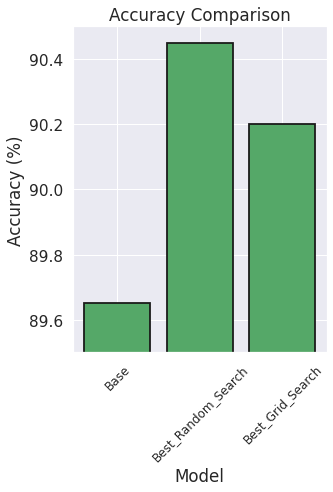

In [ ]:
#Gráfico sobre comparación de Accuracy
xvalues = list(range(len(comparison)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['Accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 89.5, ymax = 90.5)
plt.xlabel('Model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');
plt.show();

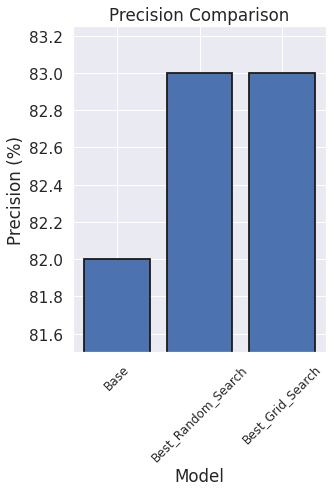

In [ ]:
#Gráfico sobre comparación de Precision
xvalues = list(range(len(comparison)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['Precision'], color = 'b', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 81.5, ymax = 83.25)
plt.xlabel('Model'); plt.ylabel('Precision (%)'); plt.title('Precision Comparison');
plt.show();

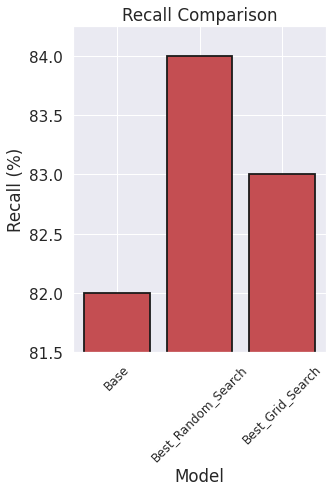

In [ ]:
#Gráfico sobre comparación de Recall
import matplotlib.pyplot as plt
xvalues = list(range(len(comparison)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['Recall'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 81.5, ymax = 84.25)
plt.xlabel('Model'); plt.ylabel('Recall (%)'); plt.title('Recall Comparison');
plt.show();

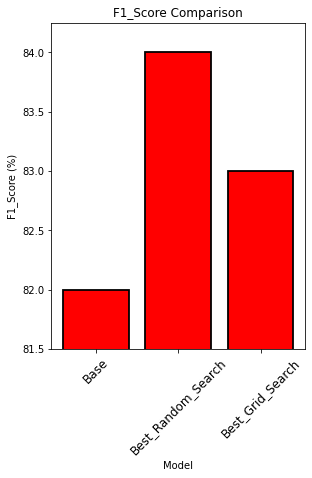

In [ ]:
#Gráfico sobre comparación de F1 Score
import matplotlib.pyplot as plt
xvalues = list(range(len(comparison)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['F1_Score'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 81.5, ymax = 84.25)
plt.xlabel('Model'); plt.ylabel('F1_Score (%)'); plt.title('F1_Score Comparison');
plt.show();

# **Random Search Hyperparameter Converted** 

In [ ]:
#Se usa random grid para buscar hiperparametros
#Se crea el modelo base
rf_converted = RandomForestClassifier()
#Random search de parametros, usando 3 fold cross validation, 
#Se busca a través de 100 combinaciones diferentes, y se usan todos los nucleos disponibles
rf_random = RandomizedSearchCV(estimator = rf_converted, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Fit el modelo random search
rf_random.fit(X_train_Converted, y_train_Converted)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#Se imprimen cuales son los mejores parámetros
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 733}

##**Grid Search with Cross Validation Converted**

In [ ]:
from sklearn.model_selection import GridSearchCV
#Se crea el grid de parametros basado en los resultados de Random Search
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [1000, 1500, 1800, 2100]
}
#Se crea el modelo base
rf = RandomForestClassifier()
#Se instancia el modelo grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
#Se hace el fit grid search en los datos
grid_search.fit(X_train_Converted, y_train_Converted)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 42.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#Se imprimen cuales son los mejores parámetros
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1000}

# **Predicción Para la métrica "Converted_Leads_From_Lead_Creating_Responses"**

In [ ]:
y_train_Converted = np.asarray(y_train_Converted, dtype="|S6")
y_test_Converted = np.asarray(y_test_Converted, dtype="|S6")

Random Forest Classifier - N = 10

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Se instancia y se hace el fit de RandomForestClassifier
forest_Converted4 = RandomForestClassifier(n_estimators = 10,random_state=10)
forest_Converted4.fit(X_train_Converted, y_train_Converted)
#Se hace la prediccion para el test set
y_pred_Converted_test4 = forest_Converted4.predict(X_test_Converted)
#Se imprime el score de accuracy
Base_Accuracy_Conv = accuracy_score(y_test_Converted, y_pred_Converted_test4)
print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test_Converted, y_pred_Converted_test4)*100))


Accuracy = 98.12%.


In [ ]:
#Matriz de confusion
confusion_matrix(y_test_Converted, y_pred_Converted_test4)

array([[1805,    5],
       [  30,   18]])

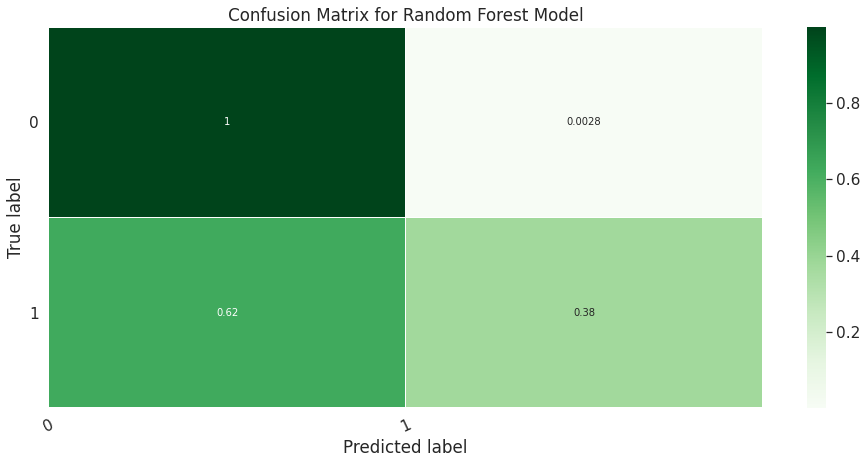

In [ ]:
#Se crea variable con la Matriz de Confusion
matrix = confusion_matrix(y_test_Converted, y_pred_Converted_test4)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Se crea el plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Se agregan labels al plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#Se ve el reporte de clasificacion para test data y predicciones
print(classification_report(y_test_Converted, y_pred_Converted_test4))

              precision    recall  f1-score   support

        b'0'       0.98      1.00      0.99      1810
        b'1'       0.78      0.38      0.51        48

    accuracy                           0.98      1858
   macro avg       0.88      0.69      0.75      1858
weighted avg       0.98      0.98      0.98      1858



Random Forest Classifier - N = 733

In [ ]:
#Se instancia y se hace el fit de RandomForestClassifier para el modelo Best Search
forest_Converted5 = RandomForestClassifier(n_estimators = 733, bootstrap = False,max_depth = 100, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5,random_state=10 )
forest_Converted5.fit(X_train_Converted, y_train_Converted)
#Se hace la prediccion para el test set
y_pred_Converted_test5 = forest_Converted5.predict(X_test_Converted)
#Se imprime el score de accuracy
Best_Random_Accuracy_Conv = accuracy_score(y_test_Converted, y_pred_Converted_test5)
print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test_Converted, y_pred_Converted_test5)*100))

Accuracy = 98.28%.


In [ ]:
#Matriz de confusion
confusion_matrix(y_test_Converted, y_pred_Converted_test5)

array([[1808,    2],
       [  30,   18]])

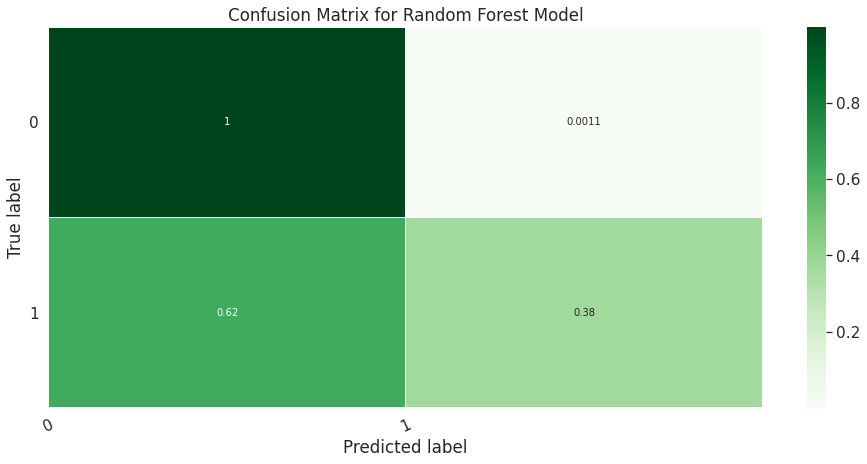

In [ ]:
#Se crea variable con la Matriz de Confusion
matrix = confusion_matrix(y_test_Converted, y_pred_Converted_test5)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Se crea el plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Se agregan labels al plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#Se ve el reporte de clasificacion para test data y predicciones
print(classification_report(y_test_Converted, y_pred_Converted_test5))

              precision    recall  f1-score   support

        b'0'       0.98      1.00      0.99      1810
        b'1'       0.90      0.38      0.53        48

    accuracy                           0.98      1858
   macro avg       0.94      0.69      0.76      1858
weighted avg       0.98      0.98      0.98      1858



Random Forest Classifier - N = 1000



In [ ]:
#Se instancia y se hace el fit de RandomForestClassifier para el modelo Grid Search
forest_Converted6 = RandomForestClassifier(n_estimators = 1000, bootstrap = False,max_depth = 80, max_features = 2, min_samples_leaf = 1, min_samples_split = 3,random_state=10 )
forest_Converted6.fit(X_train_Converted, y_train_Converted)
#Se hace la prediccion para el test set
y_pred_Converted_test6 = forest_Converted6.predict(X_test_Converted)
#Se imprime el score de accuracy
Grid_Accuracy_Conv = accuracy_score(y_test_Converted, y_pred_Converted_test6)
print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test_Converted, y_pred_Converted_test6)*100))

Accuracy = 98.33%.


In [ ]:
#Matriz de confusion
confusion_matrix(y_test_Converted, y_pred_Converted_test6)

array([[1808,    2],
       [  29,   19]])

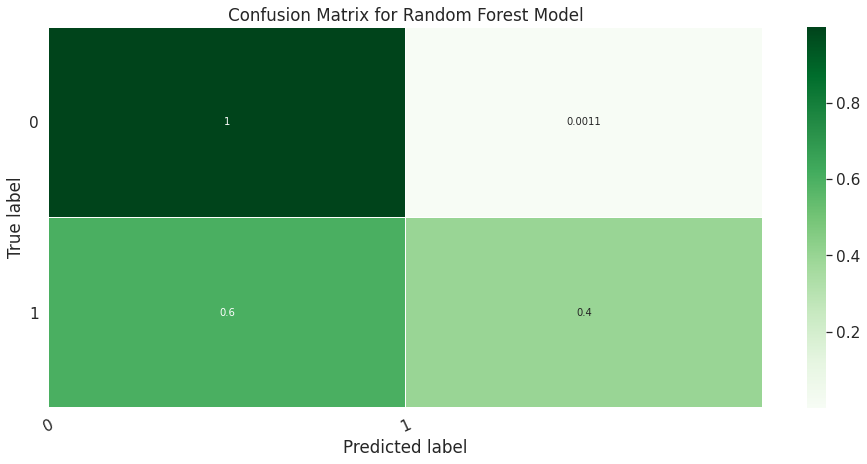

In [ ]:
#Se crea variable con la Matriz de Confusion
matrix = confusion_matrix(y_test_Converted, y_pred_Converted_test6)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Se crea el plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Se agregan labels al plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#Se ve el reporte de clasificacion para test data y predicciones
print(classification_report(y_test_Converted, y_pred_Converted_test6))

              precision    recall  f1-score   support

        b'0'       0.98      1.00      0.99      1810
        b'1'       0.90      0.40      0.55        48

    accuracy                           0.98      1858
   macro avg       0.94      0.70      0.77      1858
weighted avg       0.98      0.98      0.98      1858



**Comparación de Modelos**

Modelo Base contra Modelo Best Random Search 

In [ ]:
print('Mejora: {:0.2f}%.'.format( 100 * (Best_Random_Accuracy_Conv - Base_Accuracy_Conv) / Base_Accuracy_Conv))

Mejora: 0.16%.


Modelo Base contra Modelo Best Grid Search

In [ ]:
print('Mejora: {:0.2f}%.'.format( 100 * (Grid_Accuracy_Conv - Base_Accuracy_Conv) / Base_Accuracy_Conv))

Mejora: 0.22%.


In [ ]:
#Se crea una tabla con las variables que se necesitan para realizar comparación entre los modelos
Data_Converted = {'Model':  ['Base', 'Best_Random_Search','Best_Grid_Search'],
        'Accuracy': [98.22, 98.28,98.33],
        'N_Arboles': [10, 733,1000],
        'Precision': [78,90,90],
        'Recall': [38,38,40],
        'F1-Score': [51,53,55]
        }
Comparison_Converted = pd.DataFrame (Data_Converted, columns = ['Model','Accuracy','N_Arboles','Precision','Recall','F1-Score'])
print (Comparison_Converted)

                Model  Accuracy  N_Arboles  Precision  Recall  F1-Score
0                Base     98.22         10         78      38        51
1  Best_Random_Search     98.28        733         90      38        53
2    Best_Grid_Search     98.33       1000         90      40        55


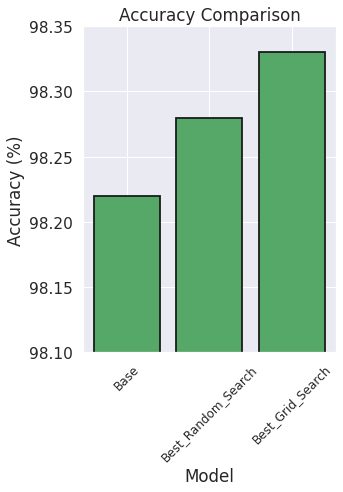

In [ ]:
#Gráfico sobre comparación de Accuracy
xvalues = list(range(len(Comparison_Converted)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, Comparison_Converted['Accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, Comparison_Converted['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 98.10, ymax = 98.35)
plt.xlabel('Model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');
plt.show();

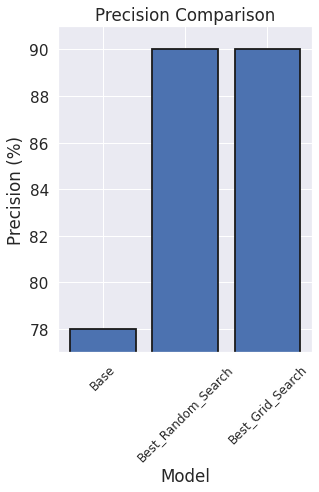

In [ ]:
#Gráfico sobre comparación de Precision
xvalues = list(range(len(Comparison_Converted)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, Comparison_Converted['Precision'], color = 'b', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, Comparison_Converted['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 77, ymax = 91)
plt.xlabel('Model'); plt.ylabel('Precision (%)'); plt.title('Precision Comparison');
plt.show();

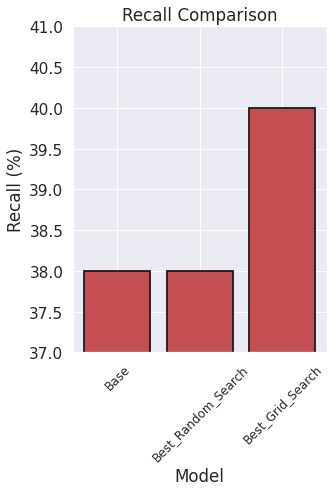

In [ ]:
#Gráfico sobre comparación de Recall
xvalues = list(range(len(Comparison_Converted)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, Comparison_Converted['Recall'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, Comparison_Converted['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 37, ymax = 41)
plt.xlabel('Model'); plt.ylabel('Recall (%)'); plt.title('Recall Comparison');
plt.show();

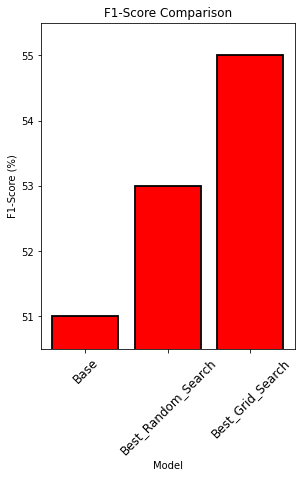

In [ ]:
#Gráfico sobre comparación de F1 Score
xvalues = list(range(len(Comparison_Converted)))
plt.subplots(1, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, Comparison_Converted['F1-Score'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, Comparison_Converted['Model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 50.5, ymax = 55.5)
plt.xlabel('Model'); plt.ylabel('F1-Score (%)'); plt.title('F1-Score Comparison');
plt.show();

# Naive Bayes Para la métrica "Converted_Lead_From_Lead_Creating_Responses"

In [ ]:
# Se realiza el split en train test sets del dataset que va a predecir la métrica "Converted_Leads_From_Lead_Creating_Responses"
X_train_ConvertedNV, X_test_ConvertedNV, y_train_ConvertedNV, y_test_ConvertedNV = train_test_split(X_Converted, y_Converted, test_size=0.30, random_state=109)
print(X_train_ConvertedNV.shape, X_test_ConvertedNV.shape, y_train_ConvertedNV.shape, y_test_ConvertedNV.shape)

(4334, 118) (1858, 118) (4334,) (1858,)


In [ ]:
#Se hace import para el modelo Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Se crea Gaussian Classifier
gnb = GaussianNB()

#Se entrena el modelo usando el training set
gnb.fit(X_train_ConvertedNV, y_train_ConvertedNV)

#Se predice la respuesta para el test dataset
y_pred_NV = gnb.predict(X_test_ConvertedNV)

In [ ]:
#Import de metricas de scikit-learn metrics
from sklearn import metrics

#Accurady del modelo
print("Accuracy:",metrics.accuracy_score(y_test_ConvertedNV, y_pred_NV))

Accuracy: 0.9741657696447793


In [ ]:
#Matriz de confusion
confusion_matrix(y_test_ConvertedNV, y_pred_NV)

array([[1810,    0],
       [  48,    0]])

In [ ]:
#Los resultados no aciertan ninguna vez cuando la métrica va a ser 1. 